## Lab Steps:

## Step 1: Importing Libraries and Loading Data

In this step, you'll start by importing the required libraries: Pandas, NumPy, Matplotlib, and Scikit-learn. These libraries will enable you to perform various tasks in the machine learning workflow.

## Importing the required libraries


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

## Step 2:  Loading the dataset

We will use MNIST dataset where each sample is classified as numbers between 0 to 9.

In [3]:
# Load the MNIST dataset and apply data transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

100.0%


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Let's see how image samples look like.

In [4]:
images, labels = next(iter(trainloader))

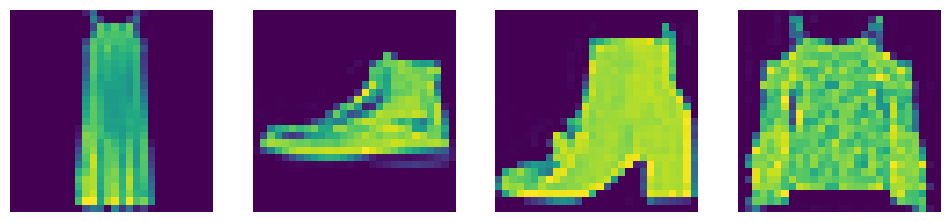

In [5]:
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
for i in range(4):
    axes[i].imshow(images[i][0])
    axes[i].axis('off')
plt.show()

Now let's build a neural network model and train the model using the above dataset

## Simple Neural Network

Define
- input dimension ==> each image sample has size 28 * 28
- ouptu dimension ==> each image is classified between 0 to 9 (total 10 classes)

In [6]:
# Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self, input_dim=None, output_dim=None):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_dim)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

## Helper function to compute accuracy and plots

In [7]:
# Function to calculate accuracy on the test set
def calculate_accuracy(net, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Function to plot training loss curve
def plot_loss_curve(losses):
    plt.plot(losses)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Training Loss Curve')
    plt.show()

# Function to plot misclassified images
def plot_misclassified_images(net, testloader, num_images=5):
    misclassified_images = []
    misclassified_labels = []
    correct_labels = []
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            incorrect_indices = (predicted != labels).nonzero(as_tuple=True)[0]
            for idx in incorrect_indices:
                misclassified_images.append(images[idx])
                misclassified_labels.append(predicted[idx])
                correct_labels.append(labels[idx])
            if len(misclassified_images) >= num_images:
                break

    fig, axes = plt.subplots(1, num_images, figsize=(12, 4))
    for i in range(num_images):
        axes[i].imshow(misclassified_images[i][0], cmap='gray')
        axes[i].set_title(f'Predicted: {misclassified_labels[i]}, Correct: {correct_labels[i]}')
        axes[i].axis('off')
    plt.suptitle('Misclassified Images')
    plt.show()

## Building the Model/Network

In [8]:
# Create an instance of the neural network
net = SimpleNN(input_dim = 28*28, output_dim = 10)

Define
- loss function
- optimizer
- learning rate (lr)
- momentum

- epoch to train

In [9]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Training parameters
num_epochs = 5
losses = []

## Train the network

In [10]:
# Train the neural network
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:  # Print every 2000 mini-batches
            print(f"[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 2000:.3f}")
            losses.append(running_loss / 2000)
            running_loss = 0.0

print("Training Finished!")

[Epoch 1, Batch 2000] Loss: 0.885
[Epoch 1, Batch 4000] Loss: 0.573
[Epoch 1, Batch 6000] Loss: 0.517
[Epoch 1, Batch 8000] Loss: 0.469
[Epoch 1, Batch 10000] Loss: 0.464
[Epoch 1, Batch 12000] Loss: 0.444
[Epoch 1, Batch 14000] Loss: 0.429
[Epoch 2, Batch 2000] Loss: 0.413
[Epoch 2, Batch 4000] Loss: 0.395
[Epoch 2, Batch 6000] Loss: 0.383
[Epoch 2, Batch 8000] Loss: 0.393
[Epoch 2, Batch 10000] Loss: 0.378
[Epoch 2, Batch 12000] Loss: 0.386
[Epoch 2, Batch 14000] Loss: 0.379
[Epoch 3, Batch 2000] Loss: 0.345
[Epoch 3, Batch 4000] Loss: 0.364
[Epoch 3, Batch 6000] Loss: 0.347
[Epoch 3, Batch 8000] Loss: 0.359
[Epoch 3, Batch 10000] Loss: 0.347
[Epoch 3, Batch 12000] Loss: 0.333
[Epoch 3, Batch 14000] Loss: 0.352
[Epoch 4, Batch 2000] Loss: 0.326
[Epoch 4, Batch 4000] Loss: 0.332
[Epoch 4, Batch 6000] Loss: 0.336
[Epoch 4, Batch 8000] Loss: 0.318
[Epoch 4, Batch 10000] Loss: 0.327
[Epoch 4, Batch 12000] Loss: 0.328
[Epoch 4, Batch 14000] Loss: 0.314
[Epoch 5, Batch 2000] Loss: 0.305
[E

## Find accuracy

In [11]:
# Test the neural network on the test data
accuracy = calculate_accuracy(net, testloader)
print(f"Accuracy on the test data: {accuracy:.2f}%")

Accuracy on the test data: 85.76%


## Plot Loss 

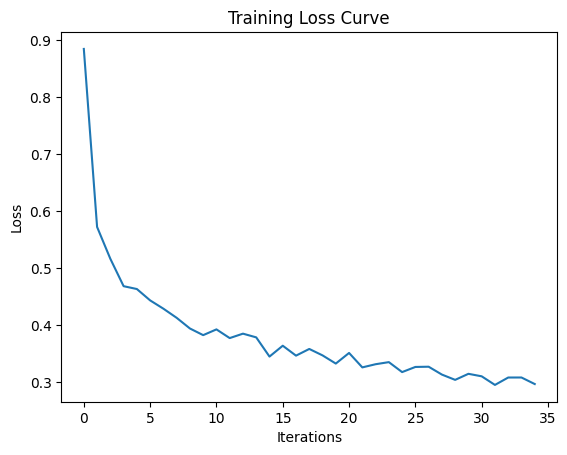

In [12]:
# Plot the training loss curve
plot_loss_curve(losses)

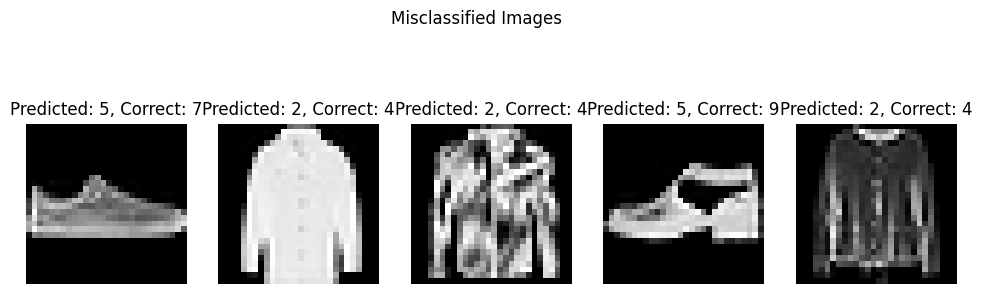

In [13]:
# Plot misclassified images
plot_misclassified_images(net, testloader)